# Forecasting New One Family Houses Sold: United States

In [1]:
import numpy as np                                           # Numpy is a fundamental package for scientific computing with Python.
import pandas as pd                                          # Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool.
import matplotlib.pyplot as plt                              # Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
from matplotlib.gridspec import GridSpec
from matplotlib import ticker
from statsmodels.tsa.stattools import adfuller, acf, pacf    # Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests., and statistical data exploration.
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf                                      # TensorFlow is an end-to-end open source platform for machine learning.

## The Data

The data consists of new one family houses sold in the united states in thousands of units, retrieved from FRED, Federal Reserve Bank of St. Louis.

LSTM - State of the art method for predicting Time Series.

In [2]:
houseSales = pd.read_csv('new_one_family_houses.csv') # U.S. Census Bureau and U.S. Department of Housing and Urban Development, 
                                                      # New One Family Houses Sold: United States [HSN1F], 
                                                      # retrieved from FRED, Federal Reserve Bank of St. Louis; 
                                                      # https://fred.stlouisfed.org/series/HSN1F, March 3
scaler = MinMaxScaler()
scaler.fit(houseSales.Sales.values.reshape(-1, 1))
houseSalesScaled = scaler.transform(houseSales.Sales.values.reshape(-1, 1))
houseSales['HouseSalesScaled'] = houseSalesScaled

In [3]:
houseSales.head()

,Unnamed: 0,Sales,HouseSalesScaled
0,1963-01-01,591.0,0.286863
1,1963-02-01,464.0,0.173369
2,1963-03-01,461.0,0.170688
3,1963-04-01,605.0,0.299374
4,1963-05-01,586.0,0.282395


## Descriptive statistics of house sales and charts

In [4]:
houseSales.describe()

,Sales,HouseSalesScaled
count,697.000000,697.000000
mean,654.005739,0.343169
std,211.685830,0.189174
min,270.000000,0.000000
25%,510.000000,0.214477
50%,625.000000,0.317248
75%,767.000000,0.444147
max,1389.000000,1.000000


Line plots of house sales

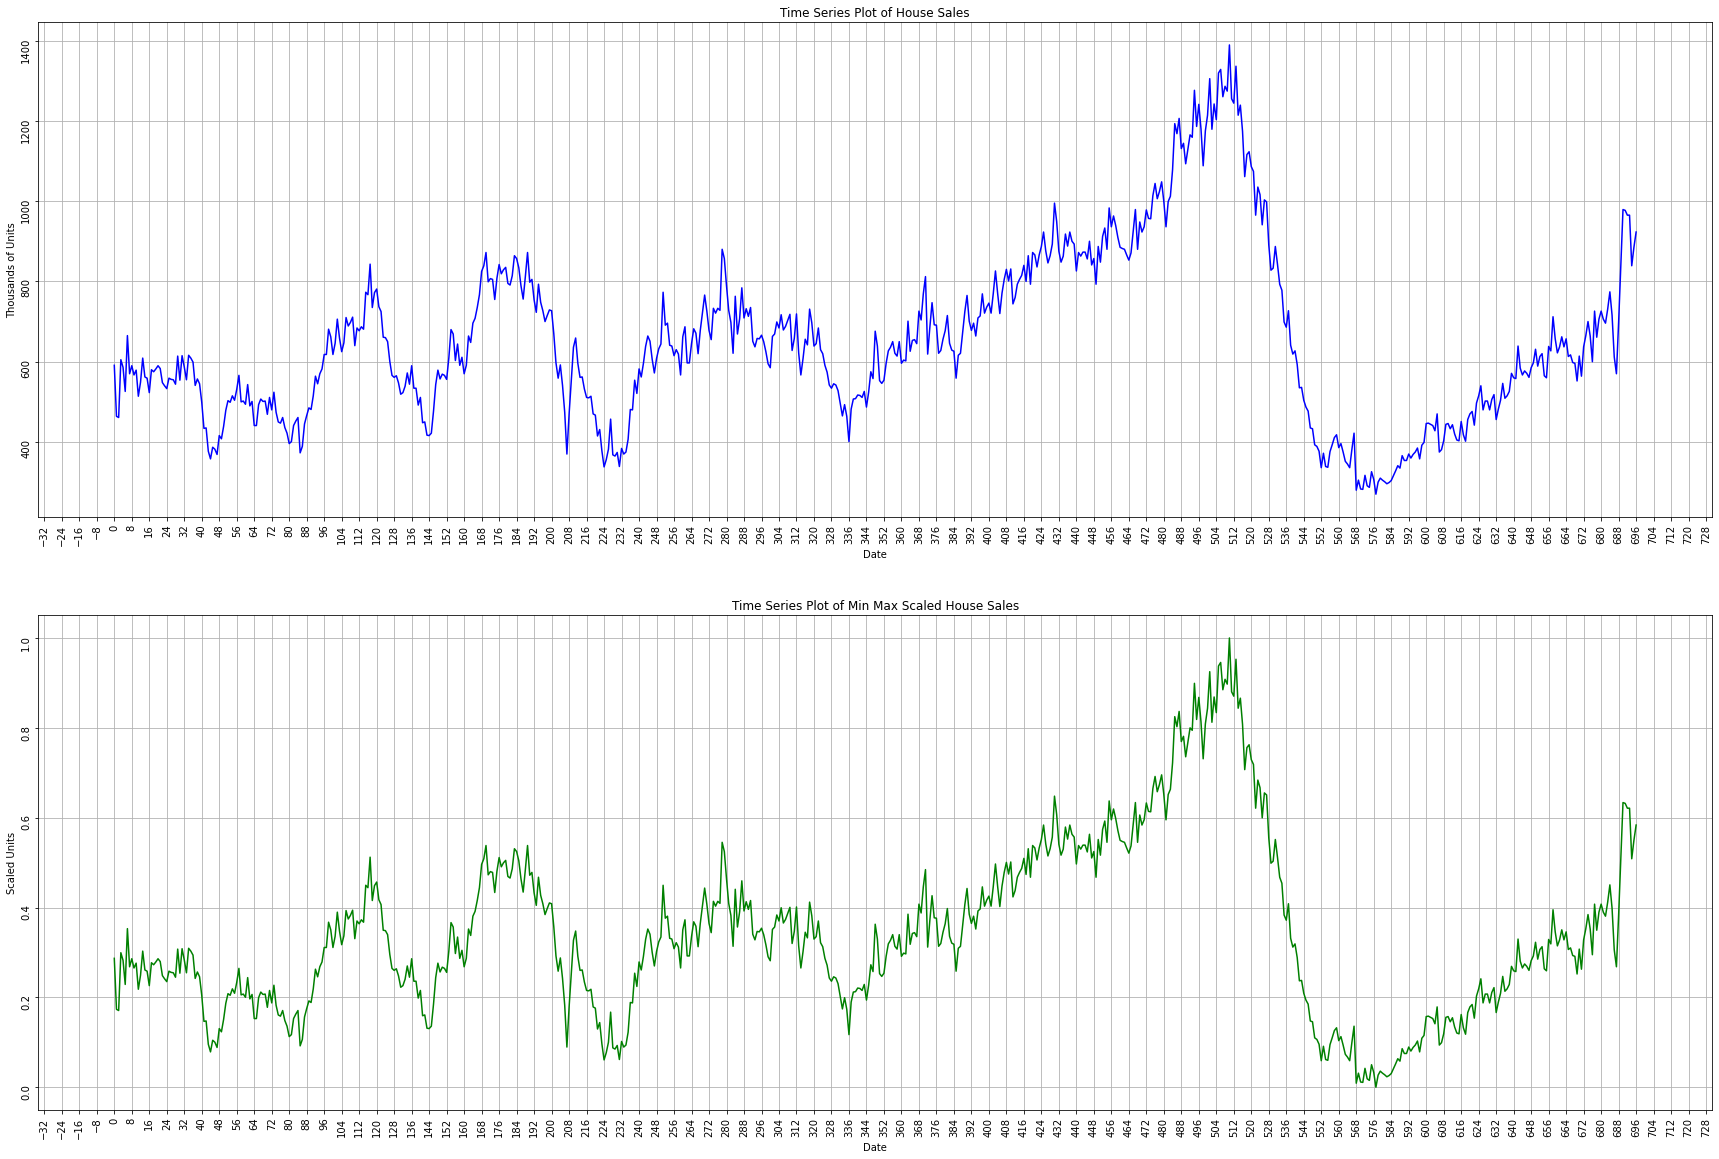

In [5]:
fig = plt.figure()
gs = GridSpec(2, 1, figure=fig)

fig.set_figheight(20)
fig.set_figwidth(30)
fig.tight_layout(pad=15)

M = 100
xticks = ticker.MaxNLocator(M)

ax1 = fig.add_subplot(gs[0,0])
ax1.plot(houseSales.index, houseSales.Sales, 'b-')
ax1.xaxis.set_major_locator(xticks)
ax1.tick_params(labelrotation=90)
ax1.set_xlabel('Date')
ax1.set_ylabel('Thousands of Units')
ax1.title.set_text('Time Series Plot of House Sales')
ax1.grid(True)

ax2 = fig.add_subplot(gs[1,0])
ax2.plot(houseSales.index, houseSales.HouseSalesScaled, 'g-')
ax2.xaxis.set_major_locator(xticks)
ax2.tick_params(labelrotation=90)
ax2.set_xlabel('Date')
ax2.set_ylabel('Scaled Units')
ax2.title.set_text('Time Series Plot of Min Max Scaled House Sales')
ax2.grid(True)

plt.savefig('image1.png')
plt.show()

The histogram of the house Sales.

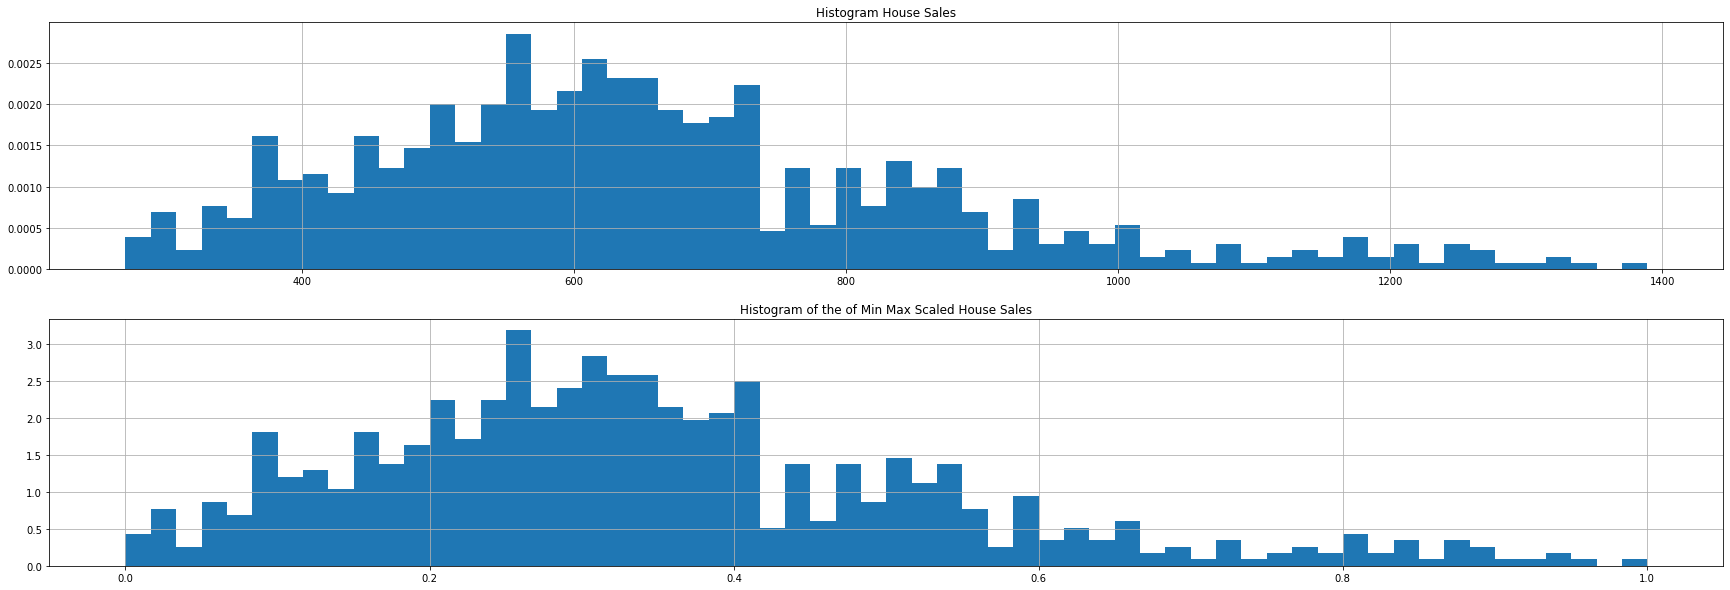

In [6]:
fig = plt.figure()
gs = GridSpec(2, 1, figure=fig)

fig.set_figheight(10)
fig.set_figwidth(30)
fig.tight_layout(pad=6)

ax1 = fig.add_subplot(gs[0,0])
ax1.hist(houseSales.Sales, density=True, bins=60)
ax1.title.set_text('Histogram House Sales')
ax1.grid(True)

ax2 = fig.add_subplot(gs[1,0])
ax2.hist(houseSales.HouseSalesScaled, density=True, bins=60)
ax2.title.set_text('Histogram of the of Min Max Scaled House Sales')
ax2.grid(True)

plt.savefig('image2.png')
plt.show() #Left skewed

## Unit root test and autocorrelogram

Augmented Dickey-Fuller test
 - p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
 - p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [7]:
result = adfuller(houseSales.Sales.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')
# Augmented Dickey Fuller(ADF) Test is a common statistical test used to test whether a given Time series is stationary or not

ADF Statistic: -2.8085520725549897
p-value: 0.05706251126952963
Critical Values:
   1%, -3.4400605106273368
Critical Values:
   5%, -2.865824986587412
Critical Values:
   10%, -2.5690518865761


In [8]:
result = adfuller(houseSales.HouseSalesScaled.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.808552072555017
p-value: 0.057062511269525856
Critical Values:
   1%, -3.4400605106273368
Critical Values:
   5%, -2.865824986587412
Critical Values:
   10%, -2.5690518865761


Autocorrelation Plot

In [9]:
acfSalesScaled = acf(houseSales.HouseSalesScaled, fft=True, nlags=40)
acfSalesScaledNp = np.array(acfSalesScaled)

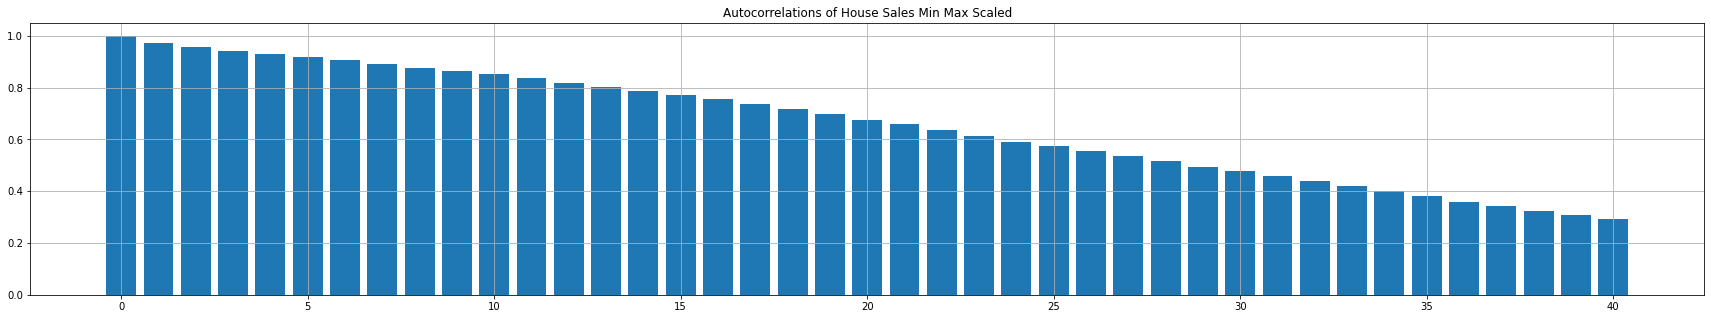

In [10]:
plt.figure(figsize=(30, 5))
plt.title("Autocorrelations of House Sales Min Max Scaled")
plt.bar(range(len(acfSalesScaledNp)), acfSalesScaledNp)
plt.grid(True)

plt.savefig('image3.png')
plt.show()

Partial Autocorrelations Plot

In [11]:
pacfSalesScaled = pacf(houseSales.HouseSalesScaled, nlags=40)
pacfSalesScaledNp = np.array(pacfSalesScaled)

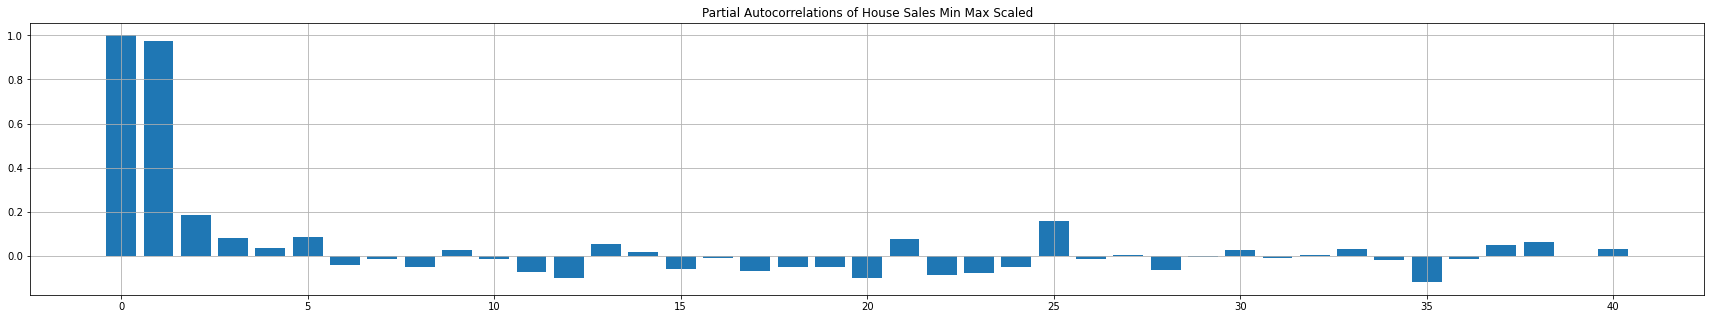

In [12]:
plt.figure(figsize=(30, 5))
plt.title("Partial Autocorrelations of House Sales Min Max Scaled")
plt.bar(range(len(pacfSalesScaledNp)), pacfSalesScaledNp)
plt.grid(True)
plt.savefig('image4.png')

plt.show() 
# 2 Spikes for the Partial Autocorrelation

## Separating the data in to a training and a validation (test) set and formatting for estimation with an LSTM

In [13]:
SIZE = len(houseSales.HouseSalesScaled)
WINDOW_SIZE = 48
BATCH_SIZE= SIZE-WINDOW_SIZE*2
EPOCHS = 200

Separating the data in training and a validation datasets.

In [14]:
DateTrain = houseSales.index.values[0:BATCH_SIZE]
DateValid = houseSales.index.values[BATCH_SIZE:]
XTrain = houseSales.HouseSalesScaled.values[0:BATCH_SIZE].astype('float32')
XValid = houseSales.HouseSalesScaled.values[BATCH_SIZE:].astype('float32')

# Obtain shapes for vectors of size (,1) for dates series

DateTrain = np.reshape(DateTrain, (-1, 1))
DateValid = np.reshape(DateValid, (-1, 1))

print("Shape of the training set date series: ", DateTrain.shape)
print("Shape of the validation set date series: ", DateValid.shape)
print()
print("Shape of the training set logarithm of sales series: ", XTrain.shape)
print("Shape of the validation set logarithm of sales series in a stateless LSTM: ", XValid.shape)

Shape of the training set date series:  (601, 1)
Shape of the validation set date series:  (96, 1)

Shape of the training set logarithm of sales series:  (601,)
Shape of the validation set logarithm of sales series in a stateless LSTM:  (96,)


In [15]:
tf.random.set_seed(1234)

def windowed_dataset(series, window_size=WINDOW_SIZE, batch_size=BATCH_SIZE): 
  series = tf.expand_dims(series, axis=-1)
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True) 
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset
  
DatasetTrain = windowed_dataset(XTrain)
DatasetVal = windowed_dataset(XValid)
  
DatasetTrain = windowed_dataset(XTrain)
DatasetVal = windowed_dataset(XValid)

## LSTM Estimation and Forecasting.

In [16]:
model_2 = tf.keras.models.Sequential([
tf.keras.layers.LSTM(8, input_shape=[None, 1], return_sequences=True),
tf.keras.layers.LSTM(4, input_shape=[None, 1]),
tf.keras.layers.Dense(1)
])
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 8)           320       
_________________________________________________________________
lstm_1 (LSTM)                (None, 4)                 208       
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 533
Trainable params: 533
Non-trainable params: 0
_________________________________________________________________


The Huber loss is chosen because it is quite robust for non linear regression models and models with non normal errors.

In [17]:
optimizer = tf.keras.optimizers.Adam()
model_2.compile(loss='huber_loss', optimizer=optimizer)
history = model_2.fit(DatasetTrain, epochs=EPOCHS, validation_data=DatasetVal, verbose=1)

Epoch 1/200
1/1 [==============================] - 15s 15s/step - loss: 0.1456 - val_loss: 0.1189
Epoch 2/200
1/1 [==============================] - 0s 254ms/step - loss: 0.1408 - val_loss: 0.1146
Epoch 3/200
1/1 [==============================] - 0s 253ms/step - loss: 0.1362 - val_loss: 0.1104
Epoch 4/200
1/1 [==============================] - 0s 244ms/step - loss: 0.1316 - val_loss: 0.1063
Epoch 5/200
1/1 [==============================] - 0s 248ms/step - loss: 0.1272 - val_loss: 0.1024
Epoch 6/200
1/1 [==============================] - 0s 248ms/step - loss: 0.1230 - val_loss: 0.0986
Epoch 7/200
1/1 [==============================] - 0s 253ms/step - loss: 0.1189 - val_loss: 0.0949
Epoch 8/200
1/1 [==============================] - 0s 221ms/step - loss: 0.1149 - val_loss: 0.0913
Epoch 9/200
1/1 [==============================] - 0s 234ms/step - loss: 0.1110 - val_loss: 0.0879
Epoch 10/200
1/1 [==============================] - 0s 262ms/step - loss: 0.1073 - val_loss: 0.0845
Epoch 11/2

1/1 [==============================] - 0s 231ms/step - loss: 0.0148 - val_loss: 0.0049
Epoch 84/200
1/1 [==============================] - 0s 223ms/step - loss: 0.0146 - val_loss: 0.0049
Epoch 85/200
1/1 [==============================] - 0s 207ms/step - loss: 0.0144 - val_loss: 0.0049
Epoch 86/200
1/1 [==============================] - 0s 218ms/step - loss: 0.0142 - val_loss: 0.0049
Epoch 87/200
1/1 [==============================] - 0s 225ms/step - loss: 0.0140 - val_loss: 0.0048
Epoch 88/200
1/1 [==============================] - 0s 219ms/step - loss: 0.0138 - val_loss: 0.0048
Epoch 89/200
1/1 [==============================] - 0s 262ms/step - loss: 0.0136 - val_loss: 0.0048
Epoch 90/200
1/1 [==============================] - 0s 264ms/step - loss: 0.0134 - val_loss: 0.0048
Epoch 91/200
1/1 [==============================] - 0s 260ms/step - loss: 0.0133 - val_loss: 0.0048
Epoch 92/200
1/1 [==============================] - 0s 263ms/step - loss: 0.0131 - val_loss: 0.0048
Epoch 93/200


1/1 [==============================] - 0s 217ms/step - loss: 0.0041 - val_loss: 0.0048
Epoch 165/200
1/1 [==============================] - 0s 217ms/step - loss: 0.0040 - val_loss: 0.0048
Epoch 166/200
1/1 [==============================] - 0s 220ms/step - loss: 0.0040 - val_loss: 0.0048
Epoch 167/200
1/1 [==============================] - 0s 252ms/step - loss: 0.0040 - val_loss: 0.0048
Epoch 168/200
1/1 [==============================] - 0s 248ms/step - loss: 0.0040 - val_loss: 0.0048
Epoch 169/200
1/1 [==============================] - 0s 271ms/step - loss: 0.0040 - val_loss: 0.0048
Epoch 170/200
1/1 [==============================] - 0s 216ms/step - loss: 0.0039 - val_loss: 0.0048
Epoch 171/200
1/1 [==============================] - 0s 243ms/step - loss: 0.0039 - val_loss: 0.0048
Epoch 172/200
1/1 [==============================] - 0s 242ms/step - loss: 0.0039 - val_loss: 0.0048
Epoch 173/200
1/1 [==============================] - 0s 260ms/step - loss: 0.0039 - val_loss: 0.0047
Epoc

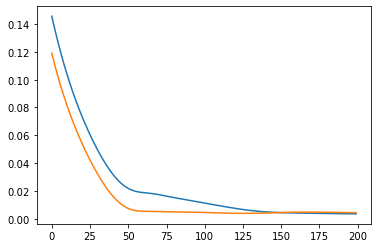

In [18]:
fig = plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [19]:
def model_forecast(model, series, window_size):
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size, shift=1, drop_remainder=True) 
  ds = ds.flat_map(lambda w: w.batch(window_size))
  ds = ds.batch(SIZE).prefetch(1)
  forecast = model.predict(ds)
  return forecast

Forecast = model_forecast(model_2, houseSales.HouseSalesScaled.values[:, np.newaxis], WINDOW_SIZE)
Results = Forecast[BATCH_SIZE-WINDOW_SIZE:-1]
Results1 = scaler.inverse_transform(Results.reshape(-1,1))
XValid1 = scaler.inverse_transform(XValid.reshape(-1,1))

LSTM line plot of forecast versus line plot of validation set.

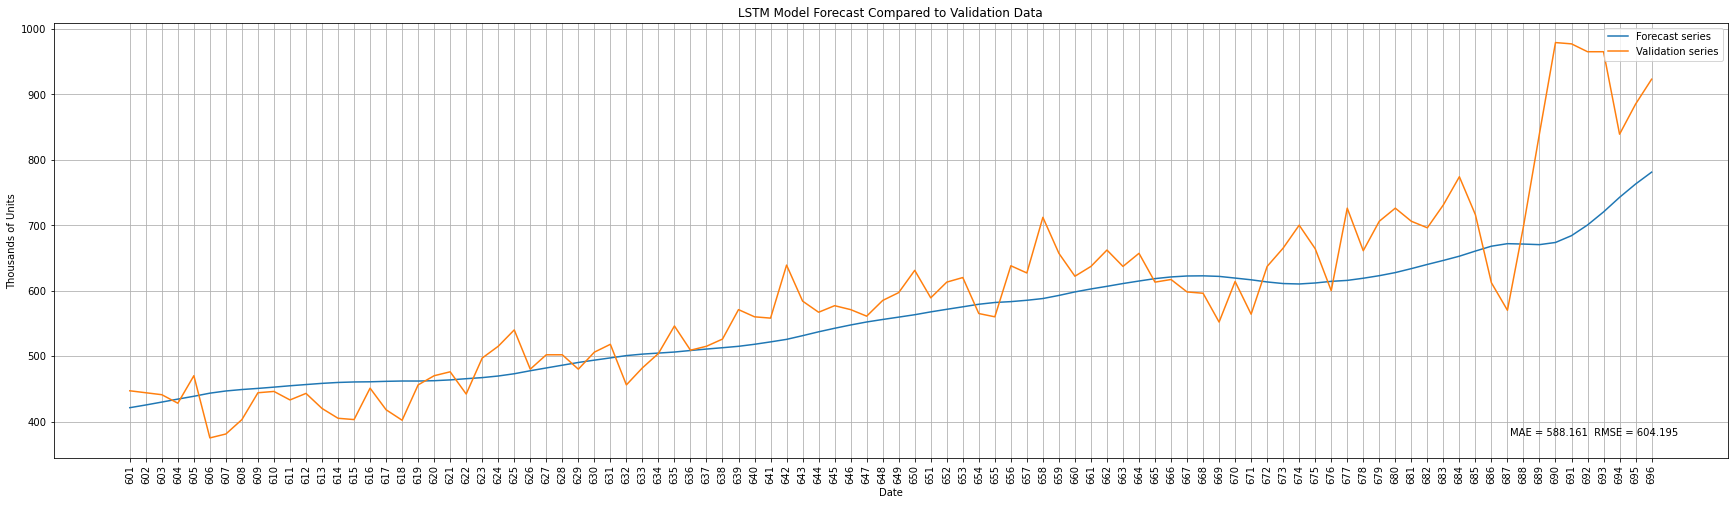

In [21]:
plt.figure(figsize=(30, 8))
plt.title("LSTM Model Forecast Compared to Validation Data")
plt.plot(DateValid, Results1, label='Forecast series')
plt.plot(DateValid, np.reshape(XValid1, (2*WINDOW_SIZE, 1)), label='Validation series')
plt.xlabel('Date')
plt.ylabel('Thousands of Units')
plt.xticks(DateValid[:,-1], rotation = 90) 
plt.legend(loc="upper right")

MAE = tf.keras.metrics.mean_absolute_error(XValid1[:,-1], Results[:,-1]).numpy()
RMSE = np.sqrt(tf.keras.metrics.mean_squared_error(XValid1[:,-1], Results[:,-1]).numpy())

textstr = "MAE = " + "{:.3f}".format(MAE) + "  RMSE = " + "{:.3f}".format(RMSE)

# place a text box in upper left in axes coords
plt.annotate(textstr, xy=(0.87, 0.05), xycoords='axes fraction')
plt.grid(True)

plt.savefig('image5.png')
plt.show()

In [22]:
print(MAE)
print(RMSE)

588.1609
604.19543
